In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

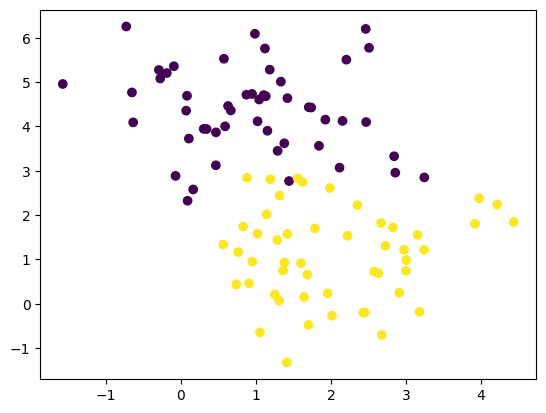

In [2]:
from sklearn import datasets

X,y = datasets.make_blobs(centers=2,random_state=0)
df = pd.DataFrame(X,columns=['x1','x2'])
df['class'] = y

plt.scatter('x1','x2',c='class',data=df)

In [3]:
df

,x1,x2,class
0,4.218503,2.234192,1
1,0.907799,0.459844,1
2,-0.276525,5.081278,0
3,0.088484,2.322991,0
4,3.243297,1.214606,1
...,...,...,...
95,-1.576720,4.957406,0
96,1.411649,-1.325739,1
97,3.004688,0.985215,1
98,-0.637628,4.091047,0


In [4]:


clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [5]:
clf

DecisionTreeClassifier()

[Text(0.5, 0.9, 'X[1] <= 2.845\ngini = 0.5\nsamples = 100\nvalue = [50, 50]'),
 Text(0.3333333333333333, 0.7, 'X[0] <= 0.364\ngini = 0.107\nsamples = 53\nvalue = [3, 50]'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5, 0.5, 'X[1] <= 2.757\ngini = 0.038\nsamples = 51\nvalue = [1, 50]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 47\nvalue = [0, 47]'),
 Text(0.6666666666666666, 0.3, 'X[1] <= 2.788\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6666666666666666, 0.7, 'gini = 0.0\nsamples = 47\nvalue = [47, 0]')]

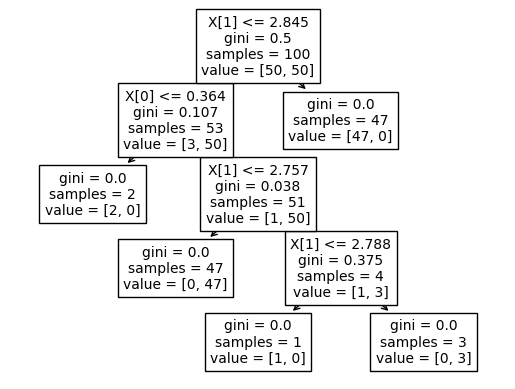

In [6]:
tree.plot_tree(clf)

In [7]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

/var/folders/wb/hsgyhgm57kbgysv0zmm8fjgc0000gn/T/ipykernel_57179/3833059615.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


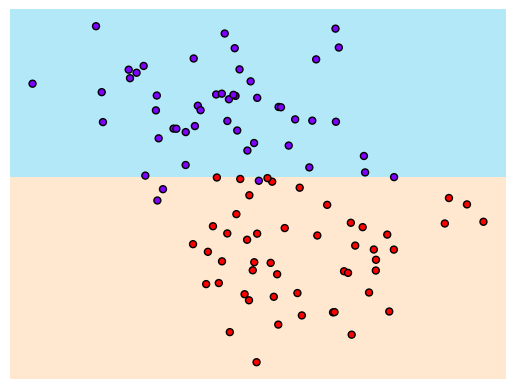

In [61]:
visualize_boundary(clf,X,y)

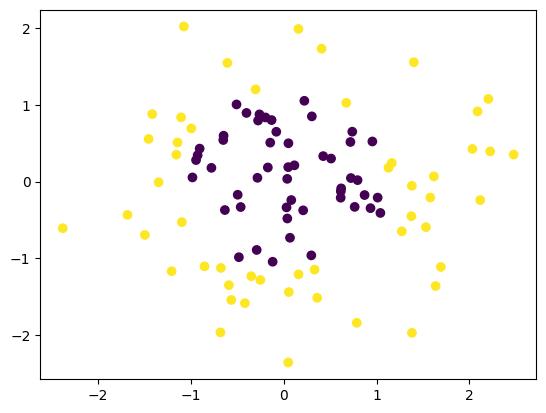

/var/folders/wb/hsgyhgm57kbgysv0zmm8fjgc0000gn/T/ipykernel_57179/3833059615.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


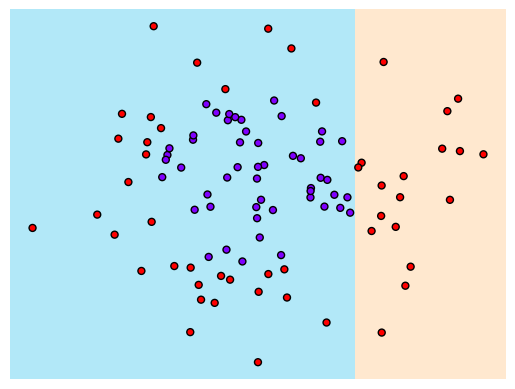

In [17]:
clf = clf.fit(X2,y2)

visualize_boundary(clf,X2,y2)

In [13]:
clf = tree.DecisionTreeClassifier(max_depth=1)

In [21]:
#Bootstrap
from sklearn.utils import resample

resample(X,replace=True,n_samples=len(X))

array([[ 2.57854418,  0.72611733],
       [ 1.15369622,  3.90200639],
       [ 1.41942144,  1.57409695],
       [ 1.15369622,  3.90200639],
       [ 1.84070628,  3.56162231],
       [-0.63762777,  4.09104705],
       [ 2.47034915,  4.09862906],
       [ 4.4384123 ,  1.84214315],
       [-0.09448254,  5.35823905],
       [ 0.08080352,  4.69068983],
       [ 0.87305123,  4.71438583],
       [ 0.62835793,  4.4601363 ],
       [ 0.08848433,  2.32299086],
       [ 1.9263585 ,  4.15243012],
       [ 1.62011397,  2.74692739],
       [ 1.12031365,  5.75806083],
       [ 3.92282648,  1.80370832],
       [ 0.829832  ,  1.74202664],
       [ 2.57854418,  0.72611733],
       [ 0.1631238 ,  2.57750473],
       [ 1.12031365,  5.75806083],
       [ 1.70536064,  4.43277024],
       [ 0.87305123,  4.71438583],
       [ 1.25185786,  0.20811388],
       [ 2.68049897, -0.704394  ],
       [ 0.56400993,  1.33705536],
       [-0.18887976,  5.20461381],
       [ 0.06897171,  4.35573272],
       [ 2.11567076,

In [105]:
for i in range(100):
    b = bootstrap(df)
    b1 = np.array(b.pop('class'))
    b = np.array(b)
    clf.fit(b,b1)
    clf.predict()

In [100]:
b = bootstrap(df)
b1 = b.pop('class')

In [101]:
b = np.array(b)
b1 = np.array(b1)

/var/folders/wb/hsgyhgm57kbgysv0zmm8fjgc0000gn/T/ipykernel_57179/3833059615.py:20: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


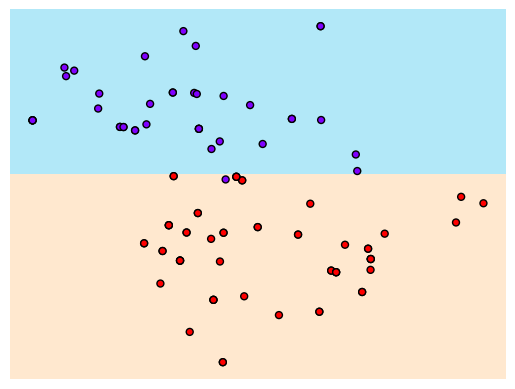

In [106]:
clf = clf.fit(b,b1)
clf.predict(b)
visualize_boundary(clf,b,b1)

In [343]:
X, y = datasets.make_gaussian_quantiles(n_samples=500,n_classes=2,random_state=4)

df = pd.DataFrame(X,columns=['x1','x2'])
df['class'] = y

df_train,df_test = train_test_split(df)

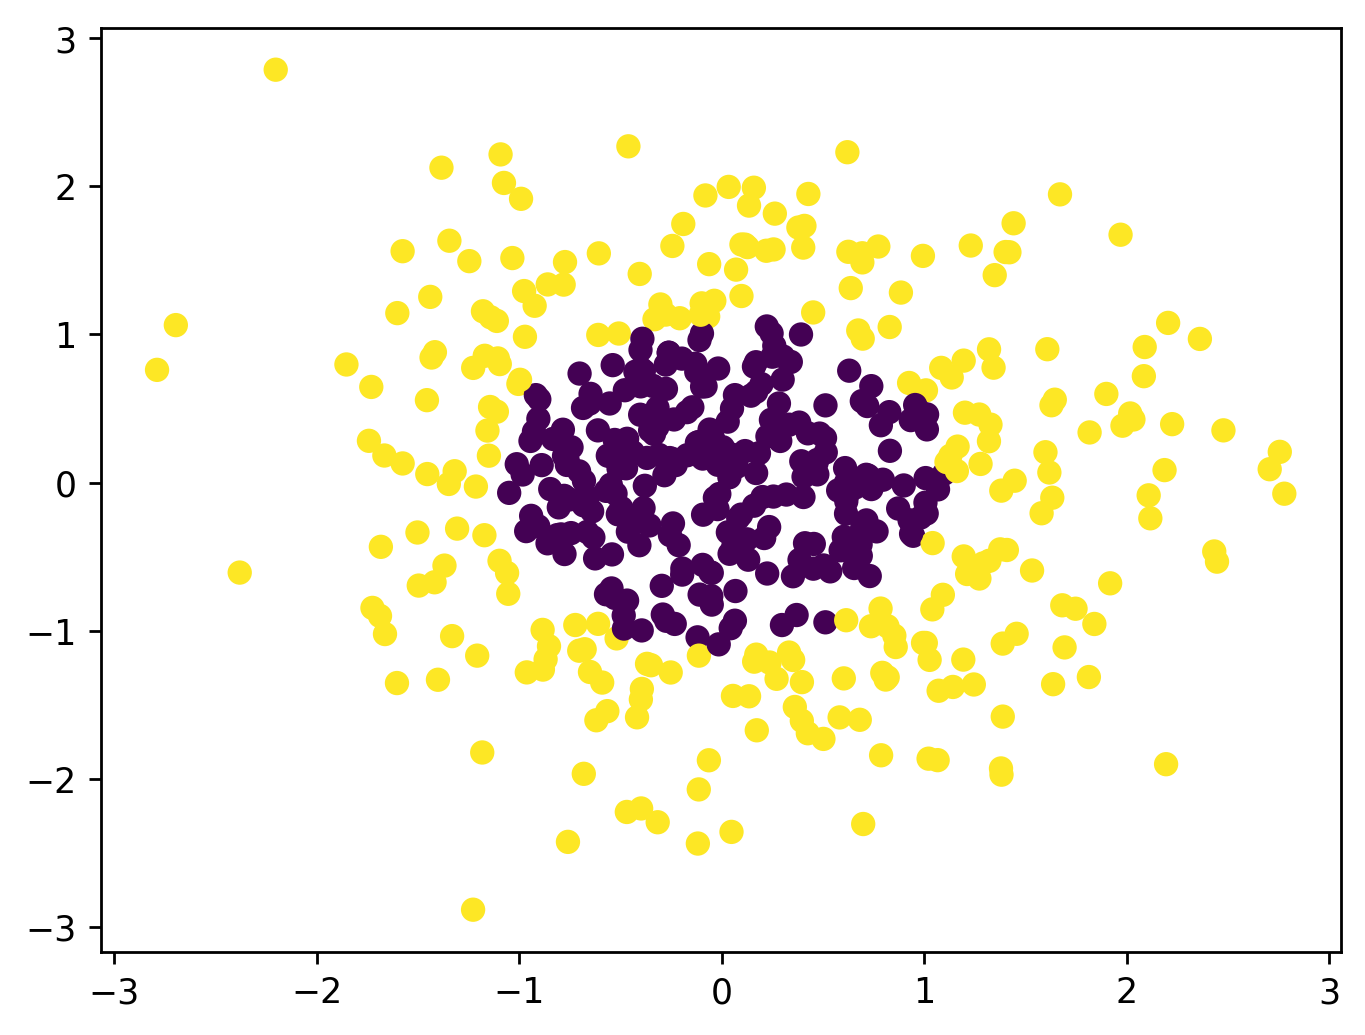

In [368]:
plt.figure(dpi=250)
plt.scatter('x1','x2',c='class',data=df)

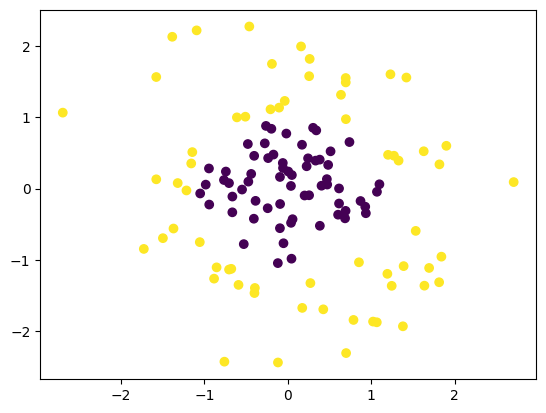

In [345]:
plt.scatter('x1','x2',c='class',data=df_test)

In [349]:
clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

IndentationError: expected an indented block (1067308548.py, line 9)

In [351]:
X, y = datasets.make_gaussian_quantiles(n_samples=500,n_classes=2,random_state=4)
df = pd.DataFrame(X,columns=['x1','x2'])
df['class'] = y

In [364]:
def rf(df,T):
    df_train,df_test = train_test_split(df)

    test = df_test
    y_test = np.array(test.pop(test.columns[-1]))

    vote = np.zeros(shape=(T,len(y_test)))


    for i in range(T):
        b = bootstrap(df_train)
        y_train = np.array(b.pop('class'))

        list = b.columns.values.tolist()
        col = random.sample(list,round(np.sqrt(len(list))))

        X_train = np.array(b[col])
        X_test = np.array(test[col])

        globals()["tree{}".format(i)] = tree.DecisionTreeClassifier(max_depth=1)
        globals()["tree{}".format(i)].fit(X_train,y_train)

        pred = globals()["tree{}".format(i)].predict(X_test)
        vote[i,:] = pred


    maj = []
    for i in range(len(y_test)):
        if vote[:,i].sum() >= 5:
           maj.append(1)
        else :
            maj.append(0)

    print(accuracy_score(y_test,maj))


In [366]:
rf(df,150)

0.872
